# HW10

In [85]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize




## Problem 3

In [67]:
def calc_soln_euler(lam,mu,X_0,num_steps,dw_vec):
    X_vec = np.zeros(num_steps+1)
    X_vec[0] = X_0
    h = 1/num_steps
    for i in range(1,num_steps+1):
        X_vec[i] = X_vec[i-1] + lam*X_vec[i-1]*h + mu*X_vec[i-1]*dw_vec[i-1]
    t_vec = np.linspace(0,1,num_steps+1)
    return t_vec,X_vec

def calc_soln_milstein(lam,mu,X_0,num_steps,dw_vec):
    X_vec = np.zeros(num_steps+1)
    X_vec[0] = X_0
    h = 1/num_steps
    for i in range(1,num_steps+1):
        X_vec[i] = X_vec[i-1] + lam*X_vec[i-1]*h + mu*X_vec[i-1]*dw_vec[i-1] + 0.5*(mu**2)*X_vec[i-1]*(dw_vec[i-1]**2 - h)
    t_vec = np.linspace(0,1,num_steps+1)
    return t_vec,X_vec

## (a)

Text(0,0.5,'$X_t$')

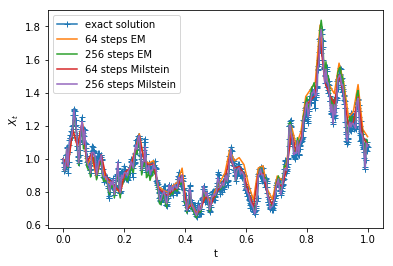

In [72]:
X_0 = 1
lam = 1.0
mu = 1.0

h = 1/1024
dw_1024_vec = np.random.normal(0,np.sqrt(h),1024)
w_1024_vec = np.zeros(1024+1)
w_1024_vec[0] = 0
w_1024_vec[1:] = np.cumsum(dw_1024_vec)

w_64_vec = w_1024_vec[::1024//64]
dw_64_vec = np.diff(w_64_vec)
w_256_vec = w_1024_vec[::1024//256]
dw_256_vec = np.diff(w_256_vec)

t_vec = np.linspace(0,1,1024+1)
exact_sol = X_0 * np.exp((lam - 0.5*mu**2)*t_vec + mu*w_1024_vec)
plt.plot(t_vec,exact_sol,label="exact solution",marker='+')

t_vec_64,X_vec_64_e = calc_soln_euler(lam,mu,X_0,64,dw_64_vec)
t_vec_256,X_vec_256_e = calc_soln_euler(lam,mu,X_0,256,dw_256_vec)
plt.plot(t_vec_64,X_vec_64_e,label="64 steps EM")
plt.plot(t_vec_256,X_vec_256_e,label="256 steps EM")

t_vec_64,X_vec_64_m = calc_soln_milstein(lam,mu,X_0,64,dw_64_vec)
t_vec_256,X_vec_256_m = calc_soln_milstein(lam,mu,X_0,256,dw_256_vec)

plt.plot(t_vec_64,X_vec_64_m,label="64 steps Milstein")
plt.plot(t_vec_256,X_vec_256_m,label="256 steps Milstein")

plt.legend()
plt.xlabel("t")
plt.ylabel(r"$X_t$")

We see that the exact solution and the numerical solutions for both EM and Milstein agree very well for both 64 and 256 number of time steps..


## (b)

In [77]:
# initial condition and parameters
X_0 = 1
lam = 1.0
mu = 1.0

n_vec = [5,6,7,8,9,10,11,12]

# M :  number of repetitions of the Brownian motion
M = 1000

weak_err_vs_n_vec_euler = []
strong_err_vs_n_vec_euler = []
weak_err_vs_n_vec_mil = []
strong_err_vs_n_vec_mil = []

for n in n_vec:
    print(n)
    h = 1/(2**n)
   
    sol_euler_table = []
    sol_mil_table = []
    sol_exact_table = []
    for _ in range(M):
        dw_vec = np.random.normal(0,np.sqrt(h),2**n)
        w_vec = np.zeros(2**n + 1)
        w_vec[0] = 0
        w_vec[1:] = np.cumsum(dw_vec)
       
        t_vec,sol_euler = calc_soln_euler(lam,mu,X_0,2**n,dw_vec)
        t_vec,sol_mil = calc_soln_milstein(lam,mu,X_0,2**n,dw_vec)
        sol_exact = X_0 * np.exp((lam - 0.5*mu**2)*t_vec + mu*w_vec)
        
        sol_euler_table.append(sol_euler)
        sol_mil_table.append(sol_mil)
        sol_exact_table.append(sol_exact)
    
    sol_euler_table = np.array(sol_euler_table)
    sol_mil_table = np.array(sol_mil_table)
    sol_exact_table = np.array(sol_exact_table)
    
    weak_err_euler = np.max(np.abs(np.average(sol_euler_table,axis=0) - np.average(sol_exact_table,axis=0)))
    strong_err_euler = np.max(np.average(np.abs(sol_euler_table - sol_exact_table),axis=0))
    weak_err_mil = np.max(np.abs(np.average(sol_mil_table,axis=0) - np.average(sol_exact_table,axis=0)))
    strong_err_mil = np.max(np.average(np.abs(sol_mil_table - sol_exact_table),axis=0))
    
    weak_err_vs_n_vec_euler.append(weak_err_euler)
    strong_err_vs_n_vec_euler.append(strong_err_euler)
    weak_err_vs_n_vec_mil.append(weak_err_mil)
    strong_err_vs_n_vec_mil.append(strong_err_mil)

5
6
7
8
9
10
11
12


In [78]:
n_vec = np.array(n_vec)
h_vec = np.power(2.0,-n_vec)

In [95]:
def fit_func(x,A,b):
    return A*np.power(x,b)

## Euler-Maruyama

Weak order of convergence 1.1470374159040404
strong order of convergence 0.5155817068179808


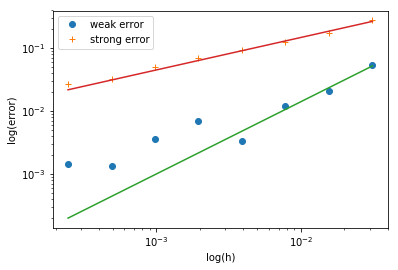

In [97]:
plt.loglog(h_vec,weak_err_vs_n_vec_euler,'o',label="weak error")
plt.loglog(h_vec,strong_err_vs_n_vec_euler,'+',label="strong error")

weak_fit = scipy.optimize.curve_fit(fit_func,h_vec,weak_err_vs_n_vec_euler)
print("Weak order of convergence",weak_fit[0][1])
plt.loglog(h_vec,fit_func(h_vec,weak_fit[0][0],weak_fit[0][1]))

strong_fit = scipy.optimize.curve_fit(fit_func,h_vec,strong_err_vs_n_vec_euler)
print("Strong order of convergence",strong_fit[0][1])
plt.loglog(h_vec,fit_func(h_vec,strong_fit[0][0],strong_fit[0][1]))

plt.xlabel("log(h)")
plt.ylabel("log(error)")
plt.legend()

## Milstein

Weak order of convergence 1.3401753674797494
Strong order of convergence 1.1271721911939923


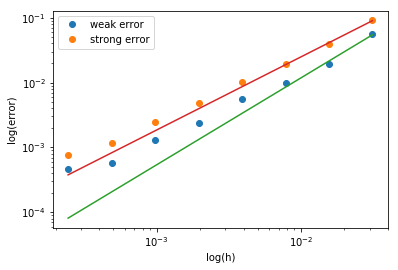

In [98]:
plt.loglog(h_vec,weak_err_vs_n_vec_mil,'o',label="weak error")
plt.loglog(h_vec,strong_err_vs_n_vec_mil,'o',label="strong error")

weak_fit = scipy.optimize.curve_fit(fit_func,h_vec,weak_err_vs_n_vec_mil)
print("Weak order of convergence",weak_fit[0][1])
plt.loglog(h_vec,fit_func(h_vec,weak_fit[0][0],weak_fit[0][1]))

strong_fit = scipy.optimize.curve_fit(fit_func,h_vec,strong_err_vs_n_vec_mil)
print("Strong order of convergence",strong_fit[0][1])
plt.loglog(h_vec,fit_func(h_vec,strong_fit[0][0],strong_fit[0][1]))

plt.xlabel("log(h)")
plt.ylabel("log(error)")
plt.legend()

# Problem 4

## (b)

In [103]:
def calc_em_sol_cubic_oscillator(beta,X_0,h,dw_vec):
    num_steps = len(dw_vec)
    X_vec = np.zeros(num_steps+1)
    X_vec[0] = X_0
    for i in range(1,num_steps+1):
        X_vec[i] = X_vec[i-1] - (X_vec[i-1]**3) * h + np.sqrt(2/beta)*dw_vec[i-1]
    t_vec = np.linspace(0,10,num_steps+1)
    return t_vec,X_vec


/Users/sandesh/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/Users/sandesh/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


(0, 10)

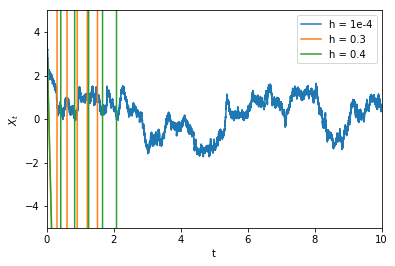

In [160]:
beta = 1.0
X_0 = 4

h = 1e-4
# as we are simulating on [0,10]
num_steps = int(10//h) 
dw_vec = np.random.normal(0,np.sqrt(h),num_steps)
t_vec,em_sol = calc_em_sol_cubic_oscillator(beta,X_0,h,dw_vec)
plt.plot(t_vec,em_sol,label="h = 1e-4")

w_vec = np.zeros(len(dw_vec) + 1)
w_vec[0] = 0
w_vec[1:] = np.cumsum(dw_vec)

w_vec_h_0p3 = w_vec[::int(0.3//h)]
dw_vec_h_0p3 = np.diff(w_vec_h_0p3)

t_vec_1,em_sol_1 = calc_em_sol_cubic_oscillator(beta,X_0,0.3,dw_vec_h_0p3)
plt.plot(t_vec_1,em_sol_1,label="h = 0.3")

w_vec_h_0p4 = w_vec[::int(0.4//h)]
dw_vec_h_0p4 = np.diff(w_vec_h_0p4)

t_vec_2,em_sol_2 = calc_em_sol_cubic_oscillator(beta,X_0,0.4,dw_vec_h_0p4)
plt.plot(t_vec_2,em_sol_2,label="h = 0.4")

plt.legend()
plt.xlabel("t")
plt.ylabel(r"$X_t$")
plt.ylim([-5,5])
plt.xlim([0,10])

As expected here, the EM solution for timesteps 0.3 and 0.4 blows up. I have restricted the y-range in the above plot. 

## (d)

In [169]:
def calc_mala_cubic_oscillator(beta,X_0,h,dw_vec):
    num_steps = len(dw_vec)
    X_vec = np.zeros(num_steps+1)
    X_vec[0] = X_0
    
    def V(x):
        return 0.25*(x**4)
    def dV(x):
        return x**3
    
    for i in range(1,num_steps+1):
        x = X_vec[i-1]
        y = X_vec[i-1] - (X_vec[i-1]**3) * h + np.sqrt(2/beta)*dw_vec[i-1]
        alpha = np.exp(-beta*(V(y) - V(x) + (0.25/h)*(x - y + h*dV(y))**2 - (0.25/h)*(y - x + h*dV(x))**2))
        if alpha >= 1:
            X_vec[i] = y
        else:
            r = np.random.uniform(0,1)
            if r < alpha:
                X_vec[i] = y
            else:
                X_vec[i] = x
    t_vec = np.linspace(0,10,num_steps+1)
    return t_vec,X_vec

(0, 10)

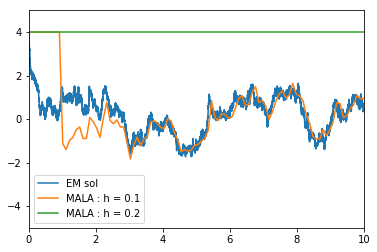

In [184]:
t_vec,em_sol = calc_em_sol_cubic_oscillator(beta,X_0,h,dw_vec)
plt.plot(t_vec,em_sol,"-",label="EM sol")


w_vec_h_0p3 = w_vec[::int(1e-1//h)]
dw_vec_h_0p3 = np.diff(w_vec_h_0p3)
t_vec,mala_sol_0p3 = calc_mala_cubic_oscillator(beta,X_0,1e-1,dw_vec_h_0p3)
plt.plot(t_vec,mala_sol_0p3,label="MALA : h = 0.1",markersize=0.1)

w_vec_h_0p4 = w_vec[::int(2e-1//h)]
dw_vec_h_0p4 = np.diff(w_vec_h_0p4)
t_vec,mala_sol_0p4 = calc_mala_cubic_oscillator(beta,X_0,2e-1,dw_vec_h_0p4)
plt.plot(t_vec,mala_sol_0p4,label="MALA : h = 0.2",markersize=0.1)

plt.legend()
plt.ylim([-5,5])
plt.xlim([0,10])

I observed for timestep > 0.2, MALA does not make a move, i.e. the solution does not change from the initial condition. Here, I have plotted MALA solutions for h = 0.1 which shows how it follows the expected solution and h = 0.2 which remains at the initial condition.